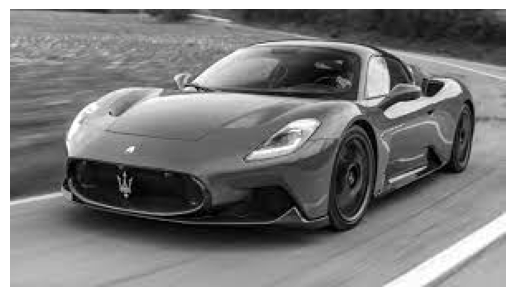

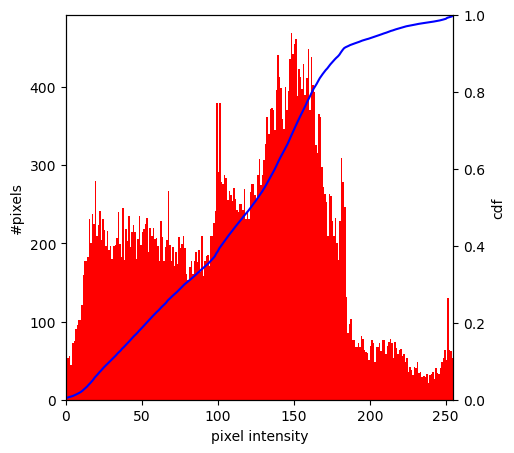

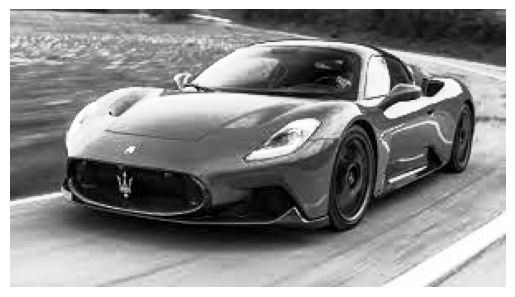

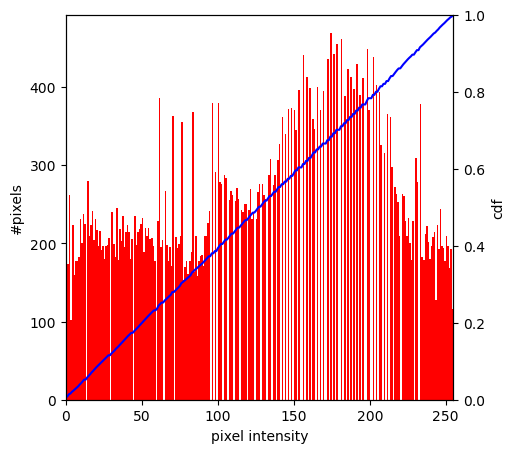

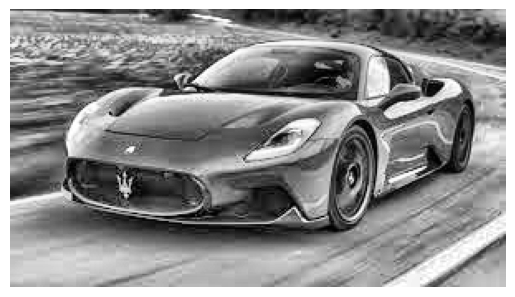

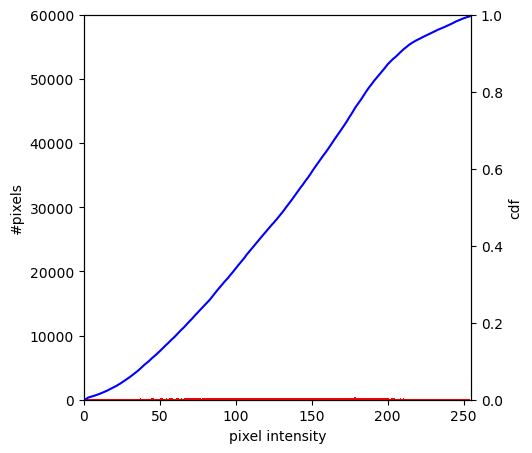

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# original image
f = cv2.imread('download.jfif', 0)

plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

hist, bins = np.histogram(f.flatten(),
                          bins=256,
                          range=[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

fig, ax = plt.subplots(figsize=(5,5))

ax.hist(f.flatten(),
        bins=256,
        range=[0,256],
        color='r')
ax.set_xlabel('pixel intensity')
ax.set_ylabel('#pixels')
ax.set_xlim(0,255)

ax2 = ax.twinx()
ax2.plot(cdf_normalized, color='b')
ax2.set_ylabel('cdf')
ax2.set_ylim(0,1)

plt.show()

# histogram equalization (global)
equ = cv2.equalizeHist(f)

plt.imshow(equ, cmap='gray')
plt.axis('off')
plt.show()

hist, bins = np.histogram(equ.flatten(),
                          bins=256,
                          range=[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

fig, ax = plt.subplots(figsize=(5,5))

ax.hist(equ.flatten(),
        bins=256,
        range=[0,256],
        color='r')
ax.set_xlabel('pixel intensity')
ax.set_ylabel('#pixels')
ax.set_xlim(0,255)

ax2 = ax.twinx()
ax2.plot(cdf_normalized, color='b')
ax2.set_ylabel('cdf')
ax2.set_ylim(0,1)

plt.show()

# CLAHE (local)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
clahef = clahe.apply(f)

plt.imshow(clahef, cmap='gray')
plt.axis('off')
plt.show()

hist, bins = np.histogram(clahef.flatten(),
                          bins=256,
                          range=[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

fig, ax = plt.subplots(figsize=(5,5))

ax.hist(clahef.flatten(),
        bins=256,
        range=[0,256],
        color='r')
ax.set_xlabel('pixel intensity')
ax.set_ylabel('#pixels')
ax.set_xlim(0,255)
ax.set_ylim(0,60000)

ax2 = ax.twinx()
ax2.plot(cdf_normalized, color='b')
ax2.set_ylabel('cdf')
ax2.set_ylim(0,1)

plt.show()

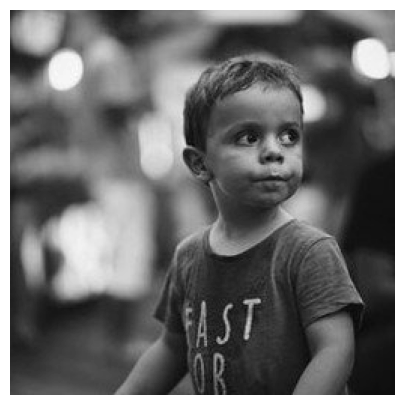

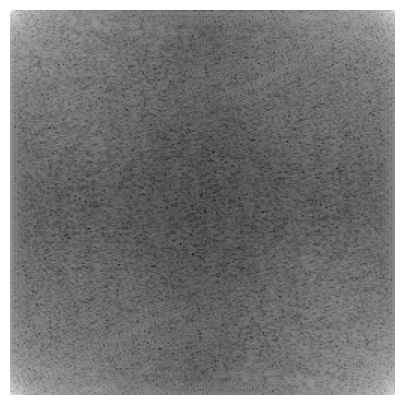

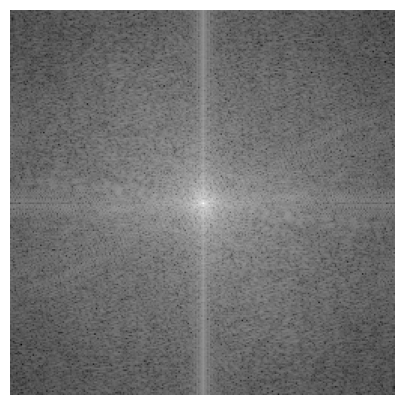

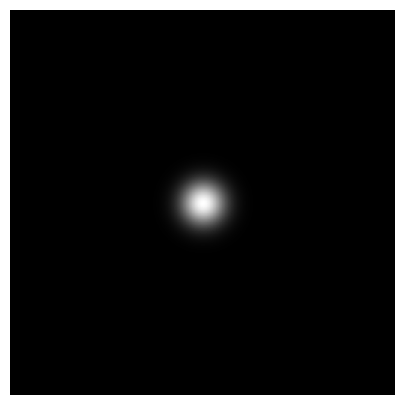

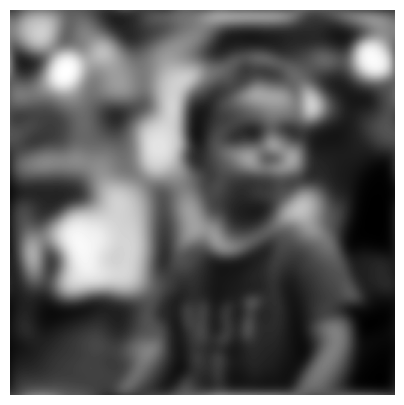

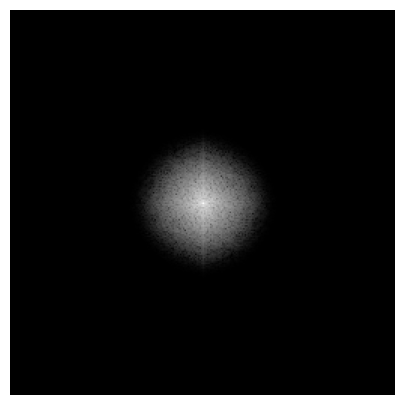

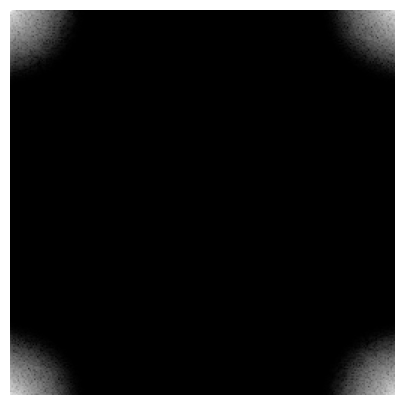

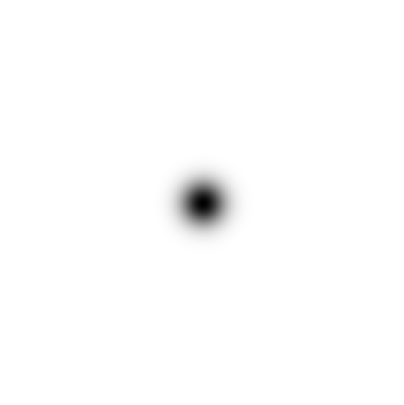

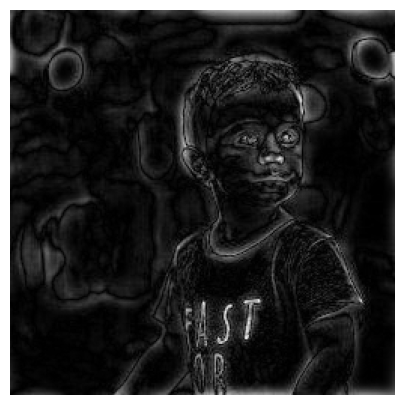

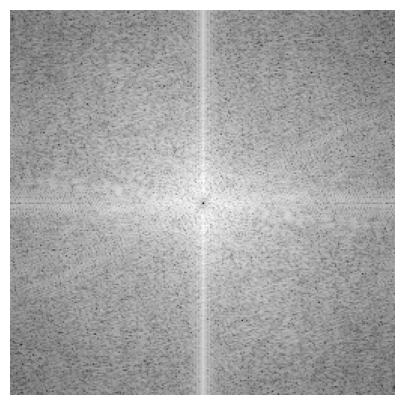

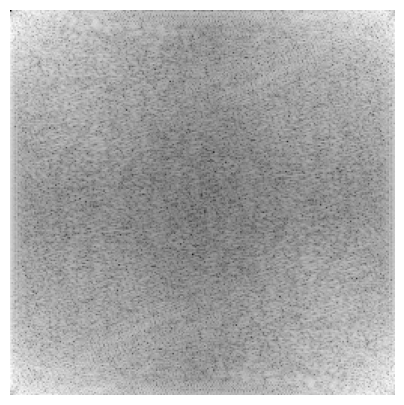

In [4]:
# libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# open the image f
f = cv2.imread('test_data.jpeg',0)

plt.figure(figsize=(5,5))
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

# transform the image into frequency domain, f --> F
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()

# Create Gaussin Filter: Low Pass Filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 10
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))

plt.figure(figsize=(5,5))
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

# Image Filters
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

# Gaussian: High pass filter
HPF = 1 - H

plt.figure(figsize=(5,5))
plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

# Image Filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()



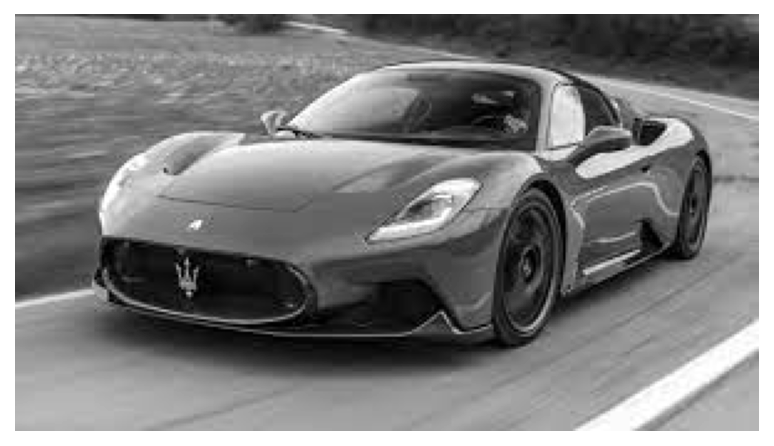

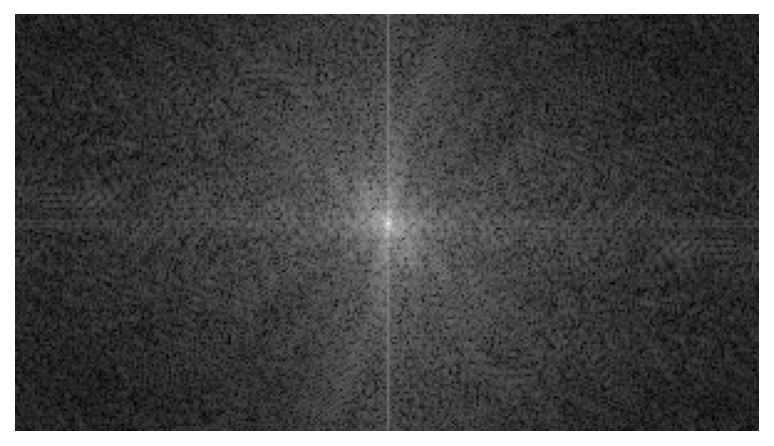

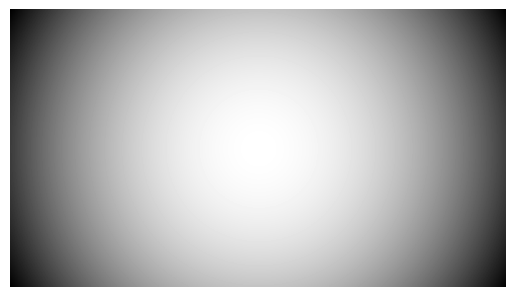

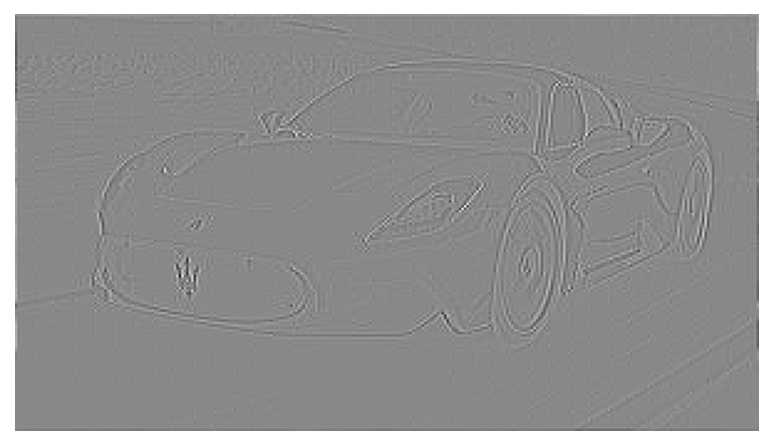

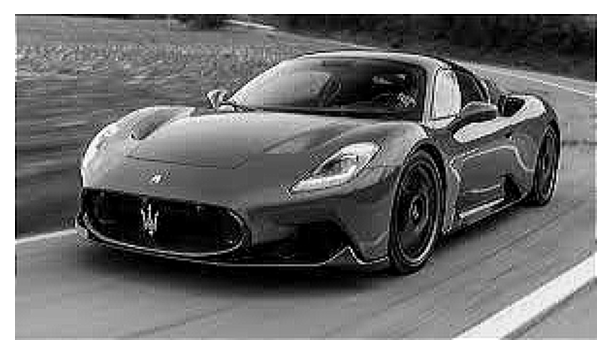

In [5]:
# Frequency domain filter: Laplacian filer
import cv2
import numpy as np
import matplotlib.pyplot as plt

# open and normalized the image
f = cv2.imread('download.jfif',0)
f = f / 255

plt.figure(dpi=150)
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

# transform into frequency domain
F = np.fft.fftshift(np.fft.fft2(f))

plt.figure(dpi=150)
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

# Laplacian Filter
P,Q = F.shape
H = np.zeros((P,Q), dtype=np.float32)
for u in range(P):
    for v in range(Q):
        H[u,v] = -4*np.pi*np.pi*((u-P/2)**2 + (v-Q/2)**2)
        
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

# Laplacian image
Lap = H * F
Lap = np.fft.ifftshift(Lap)
Lap = np.real(np.fft.ifft2(Lap))

# convert the Laplacian Image value into range [-1,1]
OldRange = np.max(Lap) - np.min(Lap)
NewRange = 1 - -1
LapScaled = (((Lap - np.min(Lap)) * NewRange) / OldRange) + -1

plt.figure(dpi=150)
plt.imshow(LapScaled, cmap='gray')
plt.axis('off')
plt.show()

# image ehancement
c = -1
g = f + c*LapScaled
g = np.clip(g, 0, 1)

plt.figure(figsize=(5,7),dpi=150)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img=mpimg.imread('download.jfif')

def getmean(image):
    x=image.shape[0]
    y=image.shape[1]
    z=x*y
    toplam=0
    for i in range(x):
        for j in range(y):
            toplam=toplam+(image[i,j,0]+image[i,j,1]+image[i,j,2])/3
            toplam=toplam/z
    return toplam
getmean(img)

<ipython-input-12-f0dac6cb879b>:13: RuntimeWarning: overflow encountered in scalar add
  toplam=toplam+(image[i,j,0]+image[i,j,1]+image[i,j,2])/3


0.00012566386899210964